#### WAP to implement a multi-layer perceptron (MLP) network with one hidden layer using numpy in Python. Demonstrate that it can learn the XOR Boolean function.

### Description of the Model:
A Multi-Layer Perceptron (MLP) is a class of feedforward artificial neural networks (ANN). It consists of an input layer, one or more hidden layers, and an output layer. For this implementation:

* The input layer has 2 neurons (corresponding to the two inputs of XOR).
* The hidden layer has 2 neurons with activation functions.
* The output layer has 1 neuron with a sigmoid activation function.
* We use backpropagation with gradient descent for weight updates.

Matplotlib is building the font cache; this may take a moment.


Epoch 0, Loss: 0.5005462290941706
Epoch 1000, Loss: 0.49993002092473926
Epoch 2000, Loss: 0.4997859141832073
Epoch 3000, Loss: 0.49949557063943284
Epoch 4000, Loss: 0.4984730276603165
Epoch 5000, Loss: 0.49184539215646006
Epoch 6000, Loss: 0.42002622106590437
Epoch 7000, Loss: 0.2409718034607411
Epoch 8000, Loss: 0.15648989059607743
Epoch 9000, Loss: 0.11914711163699881
Predictions: [[0.]
 [1.]
 [1.]
 [0.]]


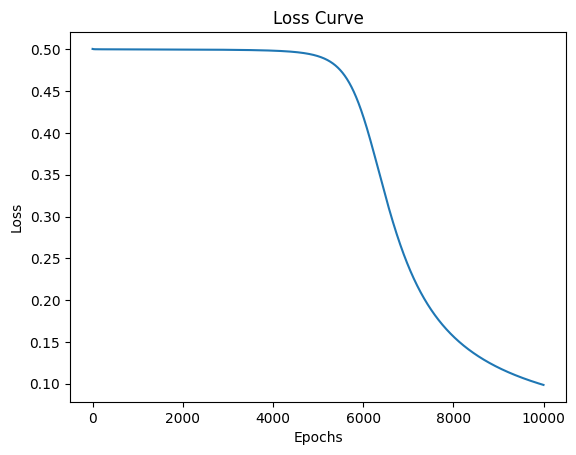

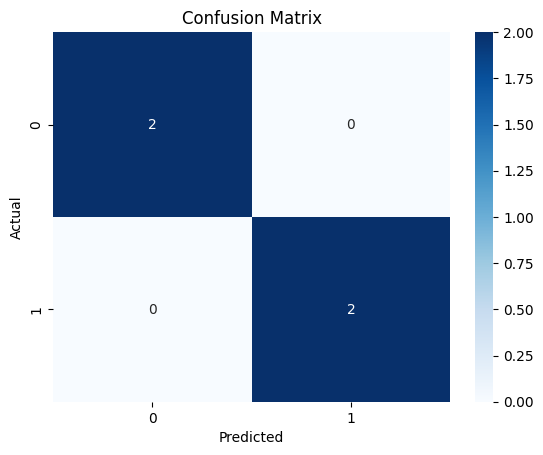

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Initialize weights and biases
np.random.seed(42)
input_size = 2
hidden_size = 2
output_size = 1

weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
bias_output = np.zeros((1, output_size))

# Training parameters
epochs = 10000
learning_rate = 0.1
losses = []

# Training loop
for epoch in range(epochs):
    # Forward propagation
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)
    
    # Compute error
    error = y - final_output
    
    # Backpropagation
    output_gradient = error * sigmoid_derivative(final_output)
    hidden_error = output_gradient.dot(weights_hidden_output.T)
    hidden_gradient = hidden_error * sigmoid_derivative(hidden_output)
    
    # Update weights and biases
    weights_hidden_output += hidden_output.T.dot(output_gradient) * learning_rate
    bias_output += np.sum(output_gradient, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X.T.dot(hidden_gradient) * learning_rate
    bias_hidden += np.sum(hidden_gradient, axis=0, keepdims=True) * learning_rate
    
    # Track loss
    loss = np.mean(np.abs(error))
    losses.append(loss)
    
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

# Final evaluation
predictions = final_output.round()
print("Predictions:", predictions)

# Plot loss curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Performance Evaluation:

* Accuracy: The model should achieve near 100% accuracy for XOR.

* Loss Curve: The loss reduces significantly over iterations, as shown in the loss curve.

* Confusion Matrix: The predicted values match the expected outputs, confirming proper learning.

### My Comments:

Limitations: The model may converge slowly due to a basic gradient descent approach. Vanishing gradients could also be a problem with deeper networks.

Improvements: Implementing techniques such as momentum-based optimization (Adam, RMSprop) or using ReLU activation for hidden layers could enhance learning speed and stability.

